In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from fastai.tabular import DatasetType
import numpy as np

In [3]:
from exp.nb_02 import gini_score
from exp.nb_04 import feature_selector, load_data_bunch, load_learner

In [4]:
train_df, test_df = pd.read_csv('data/train_feature.csv'), pd.read_csv('data/test_feature.csv')

/home/vule/miniconda3/envs/thanos/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/vule/miniconda3/envs/thanos/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train_df.sample(3)

,id,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,FIELD_4,...,FIELD_56_isna,FIELD_57_isna,n_na,is_city,age_isdiff,age1_less_18,age2_less_18,age1_gt_65,age2_gt_65,label
2260,2260,NaN,NaN,NaN,26.0,None,1,1.0,2540.0,0.0,...,False,False,3,False,True,False,False,False,False,0
8696,8696,NaN,NaN,NaN,NaN,NaN,0,0.0,-1.0,0.0,...,True,True,45,False,True,False,False,False,False,0
19863,19863,Tỉnh Tiền Giang,Huyện Cai Lậy,24.0,24.0,rare_job,0,1.0,2545.0,1.0,...,False,False,0,False,False,False,False,False,False,0


In [6]:
test_df.sample(3)

,id,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,FIELD_4,...,FIELD_55_isna,FIELD_56_isna,FIELD_57_isna,n_na,is_city,age_isdiff,age1_less_18,age2_less_18,age1_gt_65,age2_gt_65
12094,42094,NaN,NaN,NaN,44.0,None,1,1.0,2921.0,0.0,...,False,False,False,3,False,True,False,False,False,False
17090,47090,Tỉnh Bà Rịa - Vũng Tàu,Huyện Long Điền,35.0,35.0,None,1,1.0,717.0,3.0,...,False,False,False,0,False,False,False,False,False,False
1683,31683,Tỉnh Nghệ An,Huyện Nam Đàn,34.0,34.0,None,1,1.0,1084.0,1.0,...,False,False,False,0,False,False,False,False,False,False


In [7]:
test_ids, valid_ids, embed_params, params = feature_selector(train_df, test_df)

Category ['province', 'district', 'maCv', 'FIELD_7', 'FIELD_8', 'FIELD_9', 'FIELD_10', 'FIELD_11', 'FIELD_12', 'FIELD_13', 'FIELD_17', 'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_23', 'FIELD_24', 'FIELD_25', 'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29', 'FIELD_30', 'FIELD_31', 'FIELD_35', 'FIELD_36', 'FIELD_37', 'FIELD_38', 'FIELD_39', 'FIELD_40', 'FIELD_41', 'FIELD_42', 'FIELD_43', 'FIELD_44', 'FIELD_45', 'FIELD_47', 'FIELD_48', 'FIELD_49', 'province_isna', 'district_isna', 'age_source1_isna', 'age_source2_isna', 'maCv_isna', 'FIELD_1_isna', 'FIELD_2_isna', 'FIELD_3_isna', 'FIELD_4_isna', 'FIELD_5_isna', 'FIELD_6_isna', 'FIELD_7_isna', 'FIELD_8_isna', 'FIELD_9_isna', 'FIELD_10_isna', 'FIELD_11_isna', 'FIELD_12_isna', 'FIELD_13_isna', 'FIELD_14_isna', 'FIELD_15_isna', 'FIELD_16_isna', 'FIELD_17_isna', 'FIELD_18_isna', 'FIELD_19_isna', 'FIELD_20_isna', 'FIELD_21_isna', 'FIELD_22_isna', 'FIELD_23_isna', 'FIELD_24_isna', 'FIELD_25_isna', 'FIELD_26_isna', 'FIELD_27_isna', 'FIELD_28_isna',

In [8]:
# Train Data Bunch
data = load_data_bunch(**params)

data.show_batch(rows=3)

province,district,maCv,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_17,FIELD_18,FIELD_19,FIELD_20,FIELD_23,FIELD_24,FIELD_25,FIELD_26,FIELD_27,FIELD_28,FIELD_29,FIELD_30,FIELD_31,FIELD_35,FIELD_36,FIELD_37,FIELD_38,FIELD_39,FIELD_40,FIELD_41,FIELD_42,FIELD_43,FIELD_44,FIELD_45,FIELD_47,FIELD_48,FIELD_49,province_isna,district_isna,age_source1_isna,age_source2_isna,maCv_isna,FIELD_1_isna,FIELD_2_isna,FIELD_3_isna,FIELD_4_isna,FIELD_5_isna,FIELD_6_isna,FIELD_7_isna,FIELD_8_isna,FIELD_9_isna,FIELD_10_isna,FIELD_11_isna,FIELD_12_isna,FIELD_13_isna,FIELD_14_isna,FIELD_15_isna,FIELD_16_isna,FIELD_17_isna,FIELD_18_isna,FIELD_19_isna,FIELD_20_isna,FIELD_21_isna,FIELD_22_isna,FIELD_23_isna,FIELD_24_isna,FIELD_25_isna,FIELD_26_isna,FIELD_27_isna,FIELD_28_isna,FIELD_29_isna,FIELD_30_isna,FIELD_31_isna,FIELD_32_isna,FIELD_33_isna,FIELD_34_isna,FIELD_35_isna,FIELD_36_isna,FIELD_37_isna,FIELD_38_isna,FIELD_39_isna,FIELD_40_isna,FIELD_41_isna,FIELD_42_isna,FIELD_43_isna,FIELD_44_isna,FIELD_45_isna,FIELD_46_isna,FIELD_47_isna,FIELD_48_isna,FIELD_49_isna,FIELD_50_isna,FIELD_51_isna,FIELD_52_isna,FIELD_53_isna,FIELD_54_isna,FIELD_55_isna,FIELD_56_isna,FIELD_57_isna,is_city,age_isdiff,age1_less_18,age2_less_18,age1_gt_65,age2_gt_65,age_source1_na,age_source2_na,FIELD_2_na,FIELD_3_na,FIELD_4_na,FIELD_5_na,FIELD_6_na,FIELD_16_na,FIELD_21_na,FIELD_22_na,FIELD_50_na,FIELD_51_na,FIELD_52_na,FIELD_53_na,FIELD_54_na,FIELD_55_na,FIELD_56_na,FIELD_57_na,age_source1,age_source2,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_14,FIELD_15,FIELD_16,FIELD_21,FIELD_22,FIELD_32,FIELD_33,FIELD_34,FIELD_46,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57,n_na,target
#na#,#na#,#na#,[],#na#,na,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,False,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,-0.1650,-0.1685,0.5377,0.5513,0.5684,-0.5854,-0.8886,-0.3145,1.2271,1.2343,-0.2477,-0.0061,-0.2612,1.3960,0.6815,1.0942,-0.8197,-0.3003,-0.0022,-0.2454,-0.2354,-0.2564,0.0631,-0.2145,-0.2078,1.4511,0
Tỉnh Hà Tĩnh,Huyện Cẩm Xuyên,Nhân viên bán hàng,"['HS', 'HS', 'DN', 'HC']",FEMALE,DN,GH,0,0,TJ,None,False,False,False,True,None,True,True,True,True,FALSE,TRUE,FALSE,Zero,TRUE,TRUE,False,None,1,I,Zezo,None,One,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.5465,0.4936,0.5377,-1.8137,-1.1822,1.4824,0.1137,-0.3145,-0.8149,-0.8101,-0.2477,-0.0061,-0.3244,-0.7163,-1.4673,-0.9138,1.2199,-0.3003,-0.1757,-0.2454,-0.2354,-0.2564,-0.2180,-0.2145,-0.2078,-0.7244,0
Tỉnh Đồng Nai,Thành phố Biên Hòa,công nhân,"['HS', 'SV', 'DN', 'TK', 'GD', 'TK', 'DN', 'DN', 'DN']",MALE,DN,GH,3,0,YN,None,False,False,False,True,None,True,True,True,True,FALSE,FALSE,FALSE,Zero,FALSE,True,False,None,None,I,Zezo,None,One,1,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [9]:
learn = load_learner(data, embed_params)
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(66, 5)
    (1): Embedding(710, 6)
    (2): Embedding(361, 12)
    (3): Embedding(5922, 6)
    (4): Embedding(3, 3)
    (5): Embedding(36, 12)
    (6): Embedding(3, 3)
    (7): Embedding(42, 13)
    (8): Embedding(6, 4)
    (9): Embedding(215, 32)
    (10): Embedding(9, 5)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(2, 2)
    (15): Embedding(5, 4)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(3, 3)
    (21): Embedding(4, 3)
    (22): Embedding(3, 3)
    (23): Embedding(6, 4)
    (24): Embedding(6, 4)
    (25): Embedding(6, 4)
    (26): Embedding(3, 3)
    (27): Embedding(43, 13)
    (28): Embedding(10, 6)
    (29): Embedding(6, 4)
    (30): Embedding(4, 3)
    (31): Embedding(7, 5)
    (32): Embedding(4, 3)
    (33): Embedding(6, 4)
    (34): Embedding(3, 3)
    (35): Embedding(3, 3)
    (36): Embeddi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


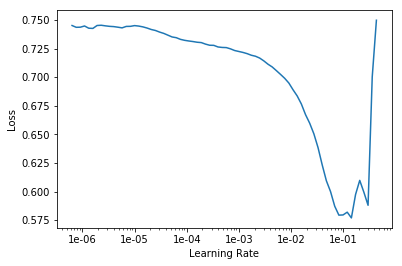

In [10]:
# select the appropriate learning rate
learn.lr_find()
# we typically find the point where the slope is steepest
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.243953,0.154681,0.975667,00:10
1,0.094541,0.096162,0.982167,00:10
2,0.096516,0.088934,0.982833,00:10
3,0.083796,0.088491,0.982833,00:10
4,0.075339,0.089556,0.982833,00:10
5,0.067920,0.089322,0.982833,00:10


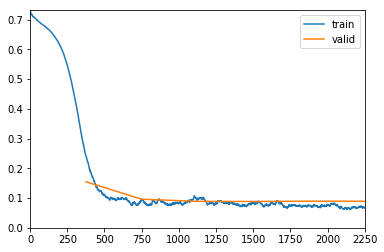

In [11]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(6, max_lr=slice(1e-03))
# 0.085

In [12]:
# Predict our target value
predictions, *_ = learn.get_preds(DatasetType.Valid)
y_score = np.array(predictions[:,1].tolist())
y_valid = list(train_df.iloc[valid_ids].label)
gini_score(y_valid, y_score)

0.161829859184611

In [13]:
# Predict our target value
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.array(predictions[:,1].tolist())
# create submission file to submit in Kaggle competition
submission = pd.DataFrame({'id': test_ids, 'label': labels})
submission.to_csv('data/submission.csv', index=False)
submission.head()

,id,label
0,30000,0.020901
1,30001,0.018727
2,30002,0.007490
3,30003,0.009004
4,30004,0.020950
